In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cleaning + Combining Data Files

In [2]:
##Import data##
sol_df = pd.read_csv('RawData/Testing/SOL_Pass_Rate.csv')
school_df = pd.read_excel("RawData/Testing/school-by-subject-2022.xlsx")


sol_divsions = sol_df.Sch_Div.to_list() #List of all schools with SOL scores

def remove_schools_with_no_score(df): # Remove any entry that does not have a listed SOL score
    filtered_df = df[df['Sch_Div'].isin(sol_divsions)]
    filtered_df.reset_index(drop=True, inplace=True)
    return filtered_df

df = sol_df.copy()
df.drop(['School', 'Division'], axis = 1, inplace= True)

# Cleaning - Demographics

Economically Disadvantaged

In [3]:
econ_df = pd.read_csv('RawData/Demographics/Economically_Disadvantaged.csv')
econ_df = remove_schools_with_no_score(econ_df)
## Make total count column numeric and replace NA with 9999999
econ_df['Total Count'] = econ_df['Total Count'].str.replace(',', '')
econ_df['Total Count'] = pd.to_numeric(econ_df['Total Count'], errors= 'coerce')
econ_df['Total Count'] = econ_df['Total Count'].fillna(9999999)

###########Clean dataset##########
results = {}
for div in sol_divsions:
    results[div] = econ_df[econ_df['Sch_Div'] == div]

no_data_sch_div = [] #schools with no econ data
one_row_sch_div = [] #schools not having both Y and N for econ data
for division, data in results.items():
    if data.empty:
        no_data_sch_div.append(division)
        continue
    if len(data) <2 or data['Total Count'].sum() > 99999:
        one_row_sch_div.append(division)

filtered_econ_df = econ_df[~econ_df['Sch_Div'].isin(one_row_sch_div)] ##Remove schools with only one Y/N from df, will add back later 

########Create new df##############
perc_dis_df = pd.DataFrame(columns = ['Sch_Div', 'Perc_Disadv_Students']) 
filtered_results = {}
for div in sol_divsions:
    filtered_results[div] = filtered_econ_df[filtered_econ_df['Sch_Div'] == div]

i = 0
for division, data in filtered_results.items():
    if division in set(filtered_econ_df.Sch_Div.to_list()): #If data not missing, calc perc of students disadvantaged
        total_count = data['Total Count'].sum() #Get total number of students
        yes_count = data[data['Disadvantaged'] == 'Y']['Total Count'].sum()
        perc_yes = 100* round(yes_count / total_count, 4)
    else: # if missing, use value -999 to indicate missing
        perc_yes = -999 
    
    perc_dis_df.loc[i] = [division, perc_yes] # add row to df
    i+=1
perc_dis_df

,Sch_Div,Perc_Disadv_Students
0,Galax Elementary Galax City Public Schools,60.33
1,Galax High Galax City Public Schools,54.55
2,Galax Middle Galax City Public Schools,61.64
3,Elydale Middle Lee County Public Schools,65.71
4,Thomas Walker High Lee County Public Schools,59.17
...,...,...
1706,Lois Hornsby Middle Williamsburg-James City Co...,32.91
1707,Matoaka Elementary Williamsburg-James City Cou...,21.93
1708,Norge Elementary Williamsburg-James City Count...,45.62
1709,Stonehouse Elementary Williamsburg-James City ...,25.07


English Learners

In [4]:
eng_learners_df = pd.read_csv('RawData/Demographics/English_Learners.csv')
eng_learners_df = remove_schools_with_no_score(eng_learners_df) 
## Make total count column numeric and replace NA with 0
eng_learners_df['Total Count'] = eng_learners_df['Total Count'].str.replace(',', '')
eng_learners_df['Total Count'] = pd.to_numeric(eng_learners_df['Total Count'], errors= 'coerce')
eng_learners_df['Total Count'] = eng_learners_df['Total Count'].fillna(9999999)

####### Clean DF #########
results = {}
for div in sol_divsions:
    results[div] = eng_learners_df[eng_learners_df['Sch_Div'] == div]

no_data_sch_div = [] #schools with no english data
one_row_sch_div = [] #schools not having both Y and N for english data
for division, data in results.items():
    if data.empty:
        no_data_sch_div.append(division)
        continue
    if len(data) !=2 or data['Total Count'].sum() > 99999:
        one_row_sch_div.append(division)

##Remove schools with only one Y/N from df, will add back later
filtered_english_df = eng_learners_df[~eng_learners_df['Sch_Div'].isin(one_row_sch_div)]

########Create new df##########
perc_eng_df = pd.DataFrame(columns = ['Sch_Div', 'Perc_Engl_Learner']) #initialize df
filtered_results = {}
for div in sol_divsions:
    filtered_results[div] = filtered_english_df[filtered_english_df['Sch_Div'] == div]

i = 0
for division, data in filtered_results.items():
    if division in set(filtered_english_df.Sch_Div.to_list()): #If data not missing, calc perc of students english learners
        total_count = data['Total Count'].sum() #Get total number of students
        yes_count = data[data['English Learners'] == 'Y']['Total Count'].sum()
        perc_yes = 100* round(yes_count / total_count, 4)
    else: # if missing, use value -999 to indicate missing
        perc_yes = -999 
    
    perc_eng_df.loc[i] = [division, perc_yes] # add row to df
    i+=1
perc_eng_df

,Sch_Div,Perc_Engl_Learner
0,Galax Elementary Galax City Public Schools,17.70
1,Galax High Galax City Public Schools,11.24
2,Galax Middle Galax City Public Schools,14.63
3,Elydale Middle Lee County Public Schools,-999.00
4,Thomas Walker High Lee County Public Schools,-999.00
...,...,...
1706,Lois Hornsby Middle Williamsburg-James City Co...,2.75
1707,Matoaka Elementary Williamsburg-James City Cou...,4.76
1708,Norge Elementary Williamsburg-James City Count...,3.74
1709,Stonehouse Elementary Williamsburg-James City ...,1.58


Gender

In [5]:
gender_df = pd.read_csv('RawData/Demographics/Gender.csv')
gender_df = remove_schools_with_no_score(gender_df)
## Make total count column numeric and replace NA with 0
gender_df['Total Count'] = gender_df['Total Count'].str.replace(',', '')
gender_df['Total Count'] = pd.to_numeric(gender_df['Total Count'], errors= 'coerce')
gender_df['Total Count'] = gender_df['Total Count'].fillna(9999999)

####### Clean DF ############
results = {}
for div in sol_divsions:
    results[div] = gender_df[gender_df['Sch_Div'] == div]

no_data_sch_div = [] #schools with no gender data
one_row_sch_div = [] #schools not having both M and F data
for division, data in results.items():
    if data.empty:
        no_data_sch_div.append(division)
        continue
    if len(data) ==1 or data['Total Count'].sum() > 99999:
        one_row_sch_div.append(division)

##Remove schools with only one M/F from df, will add back later
filtered_gender_df = gender_df[~gender_df['Sch_Div'].isin(one_row_sch_div)]

######## Create new DF #########
perc_male_df = pd.DataFrame(columns = ['Sch_Div', 'Perc_Male']) #initialize df
filtered_results = {}
for div in sol_divsions:
    filtered_results[div] = filtered_gender_df[filtered_gender_df['Sch_Div'] == div]

i = 0
for division, data in filtered_results.items():
    if division in set(filtered_gender_df.Sch_Div.to_list()): #If data not missing, calc perc of male students
        total_count = data['Total Count'].sum() #Get total number of students
        male_count = data[data['Gender'] == 'Male']['Total Count'].sum()
        perc_male = 100 * round(male_count / total_count, 4)
    else: # if missing, use value -999 to indicate missing
        perc_male = -999 
    
    perc_male_df.loc[i] = [division, perc_male] # add row to df
    i+=1

Military

In [6]:
military_df = pd.read_csv('RawData/Demographics/Military_Connected.csv')
military_df = remove_schools_with_no_score(military_df)
## Make total count column numeric and replace NA with 0
military_df['Total Count'] = military_df['Total Count'].str.replace(',', '')
military_df['Total Count'] = pd.to_numeric(military_df['Total Count'], errors= 'coerce')
military_df['Total Count'] = military_df['Total Count'].fillna(9999999)

###### Clean DF ##########
results = {}
for div in sol_divsions:
    results[div] = military_df[military_df['Sch_Div'] == div]

no_data_sch_div = [] #schools with no military data
one_row_sch_div = [] #schools not having both Y and N data
for division, data in results.items():
    if data.empty:
        no_data_sch_div.append(division)
        continue
    if len(data) ==1 or data['Total Count'].sum() > 99999:
        one_row_sch_div.append(division)

##Remove schools with only one Y/N from df, will add back later
filtered_military_df = military_df[~military_df['Sch_Div'].isin(one_row_sch_div)]


####### Create new DF ###########
perc_mil_connect_df = pd.DataFrame(columns = ['Sch_Div', 'Perc_Military_Connection']) #initialize df
filtered_results = {}
for div in sol_divsions:
    filtered_results[div] = filtered_military_df[filtered_military_df['Sch_Div'] == div]

i = 0
for division, data in filtered_results.items():
    if division in set(filtered_military_df.Sch_Div.to_list()): #If data not missing, calc perc of military students
        total_count = data['Total Count'].sum() #Get total number of students
        yes_count = data[data['Military'] == 'Y']['Total Count'].sum()
        perc_yes = 100 * round(yes_count / total_count, 4)
    else: # if missing, use value -999 to indicate missing
        perc_yes = -999 
    
    perc_mil_connect_df.loc[i] = [division, perc_yes] # add row to df
    i+=1
perc_mil_connect_df

,Sch_Div,Perc_Military_Connection
0,Galax Elementary Galax City Public Schools,0.60
1,Galax High Galax City Public Schools,0.80
2,Galax Middle Galax City Public Schools,-999.00
3,Elydale Middle Lee County Public Schools,-999.00
4,Thomas Walker High Lee County Public Schools,-999.00
...,...,...
1706,Lois Hornsby Middle Williamsburg-James City Co...,13.62
1707,Matoaka Elementary Williamsburg-James City Cou...,17.33
1708,Norge Elementary Williamsburg-James City Count...,12.60
1709,Stonehouse Elementary Williamsburg-James City ...,16.62


Disabilities

In [7]:
disability_df = pd.read_csv('RawData/Demographics/Students_with_Disabilities.csv')
disability_df = remove_schools_with_no_score(disability_df)
## Make total count column numeric and replace NA with 0
disability_df['Total Count'] = disability_df['Total Count'].str.replace(',', '')
disability_df['Total Count'] = pd.to_numeric(disability_df['Total Count'], errors= 'coerce')
disability_df['Total Count'] = disability_df['Total Count'].fillna(9999999)


#####Clean DF ########
results = {}
for div in sol_divsions:
    results[div] = disability_df[disability_df['Sch_Div'] == div]

no_data_sch_div = [] #schools with no disability data
one_row_sch_div = [] #schools not having both Y and N data
for division, data in results.items():
    if data.empty:
        no_data_sch_div.append(division)
        continue
    if len(data) !=2 or data['Total Count'].sum() > 99999:
        one_row_sch_div.append(division)

##Remove schools with only one Y/N from df, will add back later
filtered_disability_df = disability_df[~disability_df['Sch_Div'].isin(one_row_sch_div)]

##### Create new DF #######
perc_disability_df = pd.DataFrame(columns = ['Sch_Div', 'Perc_disability']) #initialize df
filtered_results = {}
for div in sol_divsions:
    filtered_results[div] = filtered_disability_df[filtered_disability_df['Sch_Div'] == div]

i = 0
for division, data in filtered_results.items():
    if division in set(filtered_disability_df.Sch_Div.to_list()): #If data not missing, calc perc of disabledZ students
        total_count = data['Total Count'].sum() #Get total number of students
        yes_count = data[data['Disabled'] == 'Y']['Total Count'].sum()
        perc_yes = 100 * round(yes_count / total_count, 4)
    else: # if missing, use value -999 to indicate missing
        perc_yes = -999 
    
    perc_disability_df.loc[i] = [division, perc_yes] # add row to df
    i+=1

Race

In [8]:
race_df = pd.read_csv('RawData/Demographics/Race.csv')
race_df = remove_schools_with_no_score(race_df)
race_df.drop(['Division Name', 'School Name', 'Total Count'], axis = 1, inplace = True)
## Make total count column numeric and replace NA with 9999999
race_df['Race_Percent'] = race_df['Race_Percent'].fillna(9999999)


########### Clean DF ##########
##DF already has percentages, just need to add NA for divisions that have no race data
##Also need to plug in 0% for schools that dont have all 7 races listed
no_data_sch_div = [div for div in sol_divsions if div not in set(race_df.Sch_Div.to_list())] #list of schools with no data at all
races = race_df.Race.value_counts().keys().to_list()


complete_data = []
for div in sol_divsions:
    for race in races:
        ########Add any missing race rows with 0% ########
        if div not in no_data_sch_div:
            data = race_df[race_df['Sch_Div'] == div]
            existing_row = race_df[(race_df['Sch_Div'] == div) & (race_df['Race'] == race)]
            if not existing_row.empty: #if there exists data for a given race
                complete_data.append(existing_row.iloc[0].to_dict()) #add to list
            else: #if no race data
                complete_data.append({'Sch_Div': div, 'Race': race, 'Race_Percent': 0})
        ####### if no race data at all###########
        else:   
            complete_data.append({'Sch_Div': div, 'Race': race, 'Race_Percent': -999})

complete_df = pd.DataFrame(complete_data)
complete_df['Race_Percent'] = round(complete_df['Race_Percent'], 2)

###Now need to convert to df with only 1 row per Sch_div --> 7 additional columns, one for each race percentage
perc_race_df = complete_df.pivot(index='Sch_Div', columns='Race', values='Race_Percent').reset_index()

# Cleaning - Economic Factors

Free and Reduced Lunches

In [9]:
## Already has percent eligable --> just need to clean data set
lunch_df = pd.read_csv('RawData/Economic Factors/Free_and_Reduced_Lunch.csv')
lunch_df = remove_schools_with_no_score(lunch_df)

##Add in missing schools with NA
perc_lunch_df = lunch_df.drop(['School', 'Division'], axis = 1)
no_data_sch_div = [div for div in sol_divsions if div not in set(perc_lunch_df.Sch_Div.to_list())]  #List of schools with no lunch data
for div in no_data_sch_div:
    perc_lunch_df.loc[perc_lunch_df.shape[0]] = [-999, div] #if no data, fill with -999

perc_lunch_df.rename(columns = {'Percent Eligible':'Perc_Free_Reduced_Lunch_Eligible'}, inplace = True)


Funding

In [10]:
##Data already in acceptable format, just need to add missing schools
funding_df = pd.read_csv('RawData/Economic Factors/Funding.csv')
funding_df = remove_schools_with_no_score(funding_df)

perc_funding_df = funding_df.drop(['School', 'Division'], axis = 1)
no_data_sch_div = [div for div in sol_divsions if div not in set(perc_funding_df.Sch_Div.to_list())]  #List of schools with no lunch data
for div in no_data_sch_div:
    perc_funding_df.loc[perc_funding_df.shape[0]] = [-999, -999,-999,-999,-999,-999,-999,div] #if no data, fill with -999

# Cleaning - Student Behaviors

Absenteeism

In [11]:
##Absentee rate already included, just need to drop columns
absent_df = pd.read_csv('RawData/Student Behaviors/Absenteeism.csv')
absent_df = remove_schools_with_no_score(absent_df)
perc_absent_df = absent_df.drop(['Division', 'School', 
                                 'Number_of_Students_Missing_10__or_More_of_the_Days_Enrolled', 
                                 'Number_of_Students_Enrolled_for_Half_the_Year_or_More'], 
                                 axis = 1)

Dropout

In [12]:
dropout_df = pd.read_csv('RawData/Student Behaviors/Dropout.csv')
dropout_df = remove_schools_with_no_score(dropout_df)
dropout_df['Students_in_the_Cohort'] = dropout_df['Students_in_the_Cohort'].fillna(9999999)
dropout_df['Cohort_Dropout_Rate'] = dropout_df['Cohort_Dropout_Rate'].fillna(9999999)
dropout_df['Dropouts'] = dropout_df['Dropouts'].fillna(9999999)

########## Clean DF ##########
results = {}
for div in sol_divsions:
    results[div] = dropout_df[dropout_df['Sch_Div'] == div]

no_data_sch_div = [div for div in sol_divsions if div not in set(dropout_df.Sch_Div.to_list())] #list of schools with no data at all
one_row_sch_div = [] #schools in df with no absent data
for division, data in results.items():
    if data['Cohort_Dropout_Rate'].sum() > 99999 or data['Dropouts'].sum() > 99999:
        one_row_sch_div.append(division)

##Remove schools with only one Y/N from df, will add back later
filtered_dropout_df = dropout_df[~dropout_df['Sch_Div'].isin(one_row_sch_div)]

#####Create DF #######
perc_dropout_df = pd.DataFrame(columns = ['Sch_Div', 'Perc_Dropout']) #initialize df
filtered_results = {}
for div in sol_divsions:
    filtered_results[div] = filtered_dropout_df[filtered_dropout_df['Sch_Div'] == div]

i = 0
for division, data in filtered_results.items():
    if division in set(filtered_dropout_df.Sch_Div.to_list()): #If data not missing, extract dropout rate
        dropout_rate = data['Cohort_Dropout_Rate'].sum()
    else: # if missing, use value -999 to indicate missing
        dropout_rate = -999 
    
    perc_dropout_df.loc[i] = [division, dropout_rate] # add row to df
    i+=1

Graduation

In [13]:
##Only care about grad completion index
grad_df = pd.read_csv('RawData/Student Behaviors/Graduation.csv')
grad_df = remove_schools_with_no_score(grad_df)
grad_df = grad_df.fillna(9999999)


######## Create DF ########
results = {}
for div in sol_divsions:
    results[div] = grad_df[grad_df['Sch_Div'] == div]

no_data_sch_div = [div for div in sol_divsions if div not in set(grad_df.Sch_Div.to_list())] #list of schools with no data at all
one_row_sch_div = [] #schools in df with no grad data
for division, data in results.items():
    if data['GEDs'].sum() > 99999:
        one_row_sch_div.append(division)

##Remove schools with only one Y/N from df, will add back later
filtered_grad_df = grad_df[~grad_df['Sch_Div'].isin(one_row_sch_div)]

####### Create new DF ##########
perc_grad_df = pd.DataFrame(columns = ['Sch_Div', 'Grad_Completion_Index']) #initialize df
filtered_results = {}
for div in sol_divsions:
    filtered_results[div] = filtered_grad_df[filtered_grad_df['Sch_Div'] == div]

i = 0
for division, data in filtered_results.items():
    if division in set(filtered_grad_df.Sch_Div.to_list()): #If data not missing, extract grad index
        grad_index = data['Graduation_Completion_Index'].sum()
    else: # if missing, use value -999 to indicate missing
        grad_index = -999 
    
    perc_grad_df.loc[i] = [division, grad_index] # add row to df
    i+=1

# Cleaning - Teachers

In [14]:
teach_edu_df = pd.read_csv('RawData/Teachers/Education_Level.csv')
teach_edu_df = remove_schools_with_no_score(teach_edu_df)
teach_edu_df.drop(['Division', 'School'], axis = 1, inplace = True)

##DF already has percentages, just need to add NA for divisions that have no teacher education data
no_data_sch_div = [div for div in sol_divsions if div not in set(teach_edu_df.Sch_Div.to_list())] #list of schools with no data at all
diplomas = teach_edu_df.Degree_Type.value_counts().keys().to_list()

complete_data = []
for div in sol_divsions:
    for diploma in diplomas:
        ########Add existing data ########
        if div not in no_data_sch_div:
            data = teach_edu_df[teach_edu_df['Sch_Div'] == div]
            existing_row = teach_edu_df[(teach_edu_df['Sch_Div'] == div) & (teach_edu_df['Degree_Type'] == diploma)]
            complete_data.append(existing_row.iloc[0].to_dict()) #add to list
        ####### if no diploma data at all###########
        else:   
            complete_data.append({'Sch_Div': div, 'Degree_Type': diploma, 'Degree_Percent': -999})

complete_df = pd.DataFrame(complete_data)

###Now need to convert to df with only 1 row per Sch_div --> 3 additional columns, 1 for each degree type
perc_teacher_edu_df = complete_df.pivot(index='Sch_Div', columns='Degree_Type', values='Degree_Percent').reset_index()

Teacher experience

In [15]:
##Already have percent, need to add missing schools
teach_exp_df = pd.read_csv('RawData/Teachers/Experience.csv')
teach_exp_df = remove_schools_with_no_score(teach_exp_df)
teach_exp_df.drop(['Division', 'School', 'Title1_Code', 'Percent_of_Out_of_Field_and_Inexperienced_Teachers'], axis = 1, inplace = True)

#DF already has percentages and NO NA vlues, just add missing scools with NA vals
no_data_sch_div = [div for div in sol_divsions if div not in set(teach_exp_df.Sch_Div.to_list())] #list of schools with no data at all
perc_exp_teach_df = teach_exp_df.copy()
for div in no_data_sch_div:
    perc_exp_teach_df.loc[perc_exp_teach_df.shape[0]] = ['UNKNOWN', -999, -999, div]

# Combine into 1 Dataframe

In [16]:
##Add in addresses
location_df = pd.read_csv('RawData/School Addresses.csv')
location_df.rename(columns={'Sch_div': 'Sch_Div'}, inplace=True)
location_df.drop(['School', 'Division', 'Street', 'City', 'State', 'Zip'], axis = 1, inplace = True)

########## Create merged df #########
merged_df = sol_df.copy()
dataframes = [
    perc_dis_df,
    perc_eng_df,
    perc_male_df,
    perc_mil_connect_df,
    perc_disability_df,
    perc_race_df,
    perc_lunch_df,
    perc_funding_df,
    perc_absent_df,
    perc_dropout_df,
    perc_grad_df,
    perc_teacher_edu_df,
    perc_exp_teach_df,
    location_df
]

##Merge
for df in dataframes:
    merged_df = pd.merge(merged_df, df, on = 'Sch_Div', how = 'outer')

##Export##
merged_df.to_excel('RawData/Combined_Data.xlsx', index = False)

# Train-Val-Test Split + Data Pipeline

In [17]:
drop_cols = ['School', 'Division', 'Sch_Div']
merged_df = pd.read_excel('RawData/Combined_Data.xlsx')
df = merged_df.drop(columns = drop_cols)

60-20-20 Train-Val-Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_df = df.drop('SOL Pass Rate', axis = 1)
y_df = df['SOL Pass Rate']
X_sub, X_test, y_sub, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state=42) # 20% testing
X_train, X_val, y_train, y_val = train_test_split(X_sub, y_sub, test_size = 0.25, random_state=42)  #20% validation, 60% training
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Training set: (1026, 32)
Validation set: (342, 32)
Test set: (343, 32)


Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

###### Initialize numerical and categorical feature lists #########
num_cols = X_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# *Will deal with poverty level separately*
cat_cols = [col for col in X_train.columns if col not in num_cols and col != 'Poverty_Level']

##################### Create Pipeline ########################
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median',missing_values=-999.00)), 
    ('std_scaler', StandardScaler()),
])

# Pipeline for "Poverty_Level" (imputation + ordinal encoding)
poverty_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Medium Poverty', missing_values = "UNKNOWN")),  # Impute 'unknown' with 'medium'
    ('encoder', OrdinalEncoder(categories=[['Low Poverty', 'Medium Poverty', 'High Poverty']]))  # Ordinal encoding
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_cols),  # Numerical columns pipeline
    ('poverty', poverty_pipeline, ['Poverty_Level']),
    ("cat", cat_pipeline, ['Poverty_Level'] + cat_cols)  # Apply both imputation and encoding to categorical columns
])

############ Transform Data #################
X_train_transformed = full_pipeline.fit_transform(X_train)
X_val_transformed = full_pipeline.transform(X_val)
X_test_transformed = full_pipeline.transform(X_test)

#### Create DFs of transformed data
feature_names = full_pipeline.get_feature_names_out()
## Convert to df
X_train_clean = pd.DataFrame(X_train_transformed, columns=feature_names)
X_val_clean = pd.DataFrame(X_val_transformed, columns=feature_names)
X_test_clean = pd.DataFrame(X_test_transformed, columns=feature_names)

##Reset index
y_train_clean = y_train.reset_index(drop = True)
y_val_clean = y_val.reset_index(drop = True)
y_test_clean = y_test.reset_index(drop = True)

###Drop extra poverty features
pov_cols = ['cat__Poverty_Level_High Poverty', 'cat__Poverty_Level_Low Poverty',
       'cat__Poverty_Level_Medium Poverty', 'cat__Poverty_Level_UNKNOWN']
X_train_clean.drop(pov_cols, inplace=True, axis = 1)
X_val_clean.drop(pov_cols, inplace=True, axis = 1)
X_test_clean.drop(pov_cols, inplace=True, axis = 1)

# Modeling - Neural Network

In [21]:
import numpy as np
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Tuning

In [22]:
def model_builder(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train_clean.shape[1],)))

    hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])
    learning_rate = hp.Choice('lr', values=[5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2])
    hp_layer_1 = hp.Int('layer_1', min_value=1400, max_value=1600, step=50)
    hp_layer_2 = hp.Int('layer_2', min_value=1000, max_value=1200, step=25)
    hp_layer_3 = hp.Int('layer_3', min_value=1200, max_value=1400, step=25)
    hp_layer_4 = hp.Int('layer_4', min_value=1200, max_value=1400, step=25)
    hp_layer_5 = hp.Int('layer_5', min_value=1700, max_value=1900, step=25)
    hp_layer_6 = hp.Int('layer_6', min_value=1100, max_value=1300, step=25)
    hp_drop_1 = hp.Choice('drop_1', values=[0.0, 0.25, 0.5, 0.75, 0.999999999])
    hp_drop_2 = hp.Choice('drop_2', values=[0.0, 0.25, 0.5, 0.75, 0.999999999])
    hp_drop_3 = hp.Choice('drop_3', values=[0.0, 0.25, 0.5, 0.75, 0.999999999])
    hp_drop_4 = hp.Choice('drop_4', values=[0.0, 0.25, 0.5, 0.75, 0.999999999])
    hp_drop_5 = hp.Choice('drop_5', values=[0.0, 0.25, 0.5, 0.75, 0.999999999])
    hp_drop_6 = hp.Choice('drop_6', values=[0.0, 0.25, 0.5, 0.75, 0.999999999])

    model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation))
    model.add(tf.keras.layers.Dropout(hp_drop_1))
    model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))
    model.add(tf.keras.layers.Dropout(hp_drop_2))
    model.add(tf.keras.layers.Dense(units=hp_layer_3, activation=hp_activation))
    model.add(tf.keras.layers.Dropout(hp_drop_3))
    model.add(tf.keras.layers.Dense(units=hp_layer_4, activation=hp_activation))
    model.add(tf.keras.layers.Dropout(hp_drop_4))
    model.add(tf.keras.layers.Dense(units=hp_layer_5, activation=hp_activation))
    model.add(tf.keras.layers.Dropout(hp_drop_5))
    model.add(tf.keras.layers.Dense(units=hp_layer_6, activation=hp_activation))
    model.add(tf.keras.layers.Dropout(hp_drop_6))
    model.add(tf.keras.layers.Dense(units=1))  # Output layer for regression

    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss= 'mean_squared_error',  # Use MSE for regression
                  #metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')] # RMSE metric
                  )  

    return model

##Initialize tuner
tuner = kt.Hyperband(model_builder,
                     objective=kt.Objective('val_loss', 'min'),
                     max_epochs=50,
                     factor=5,
                     directory='./dir',
                     project_name='x')


##Tune parameters
tuner.search(X_train_clean.to_numpy(), y_train_clean, 
             validation_data = (X_val_clean, y_val_clean), 
             epochs = 50)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Reloading Tuner from ./dir/x/tuner0.json


Construct, train, and evaluate neural network

Epoch 1/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 3339.7769 - val_loss: 311.2034
Epoch 2/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 298.3626 - val_loss: 262.6779
Epoch 3/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 312.4838 - val_loss: 261.1272
Epoch 4/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 309.9271 - val_loss: 261.1547
Epoch 5/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 350.8948 - val_loss: 260.9970
Epoch 6/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 343.1776 - val_loss: 260.8800
Epoch 7/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 267.7991 - val_loss: 261.9218
Epoch 8/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 297.4327 - val_loss: 261.0215
Epoch 9/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 338.7354 - val_loss: 260.8978
Epoch 10/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 267.1584 - val_loss: 262.3324
Epoch 11/250
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 265.0327 - val_loss: 261.0391
Epoch 1

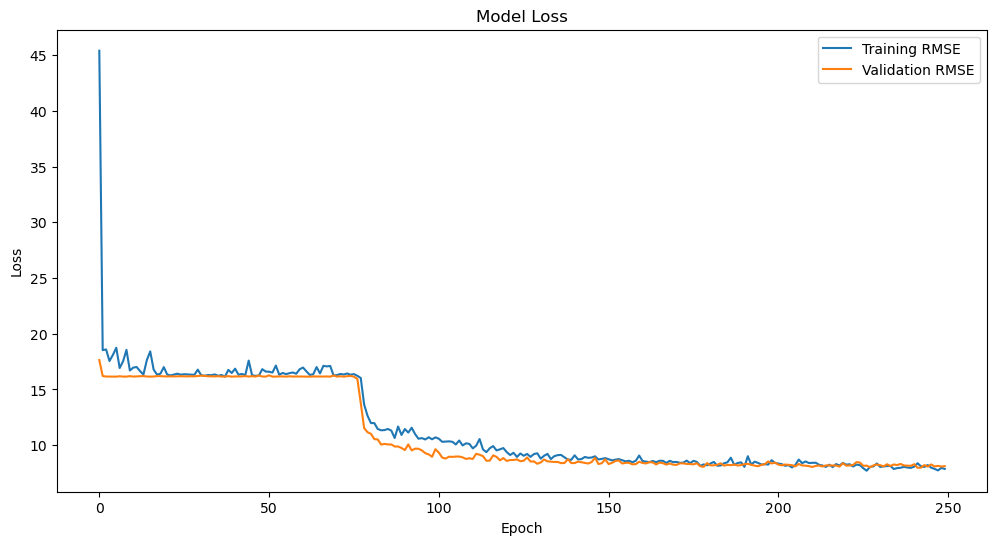

In [34]:
nn_model = tuner.hypermodel.build(best_hps)
history = nn_model.fit(X_train_clean.to_numpy(), y_train_clean, 
                       epochs = 250, validation_data = (X_val_clean, y_val_clean))

### Plot model loss
plt.figure(figsize=(12, 6))
loss = np.sqrt(history.history['loss'])
val_loss = np.sqrt(history.history['val_loss'])
plt.plot(loss, label='Training RMSE')
plt.plot(val_loss, label='Validation RMSE')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [35]:
####### Get Neural Network metrics #####
##Validation
nn_val_predictions = nn_model.predict(X_val_clean)
nn_val_score = np.round(np.sqrt(mean_squared_error(y_val_clean, nn_val_predictions)), 4)
print(f"NN validation RMSE: {nn_val_score}")

##Testing
nn_test_predictions = nn_model.predict(X_test_clean)
nn_test_score = np.round(np.sqrt(mean_squared_error(y_test_clean, nn_test_predictions)), 4)
print(f"NN test RMSE: {nn_test_score}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
NN validation RMSE: 8.1205
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
NN test RMSE: 8.0984


In [36]:
## Export model
import joblib
joblib.dump(nn_model, './Models/nn_model.pkl')

['./Models/nn_model.pkl']

# Modeling - XGBoost + Random Forest

In [26]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import ensemble
from xgboost import XGBRegressor
import joblib

Tuning

In [27]:
###Create parameter grid ##
model_params = {
    'xgbRegressor': {
        'model': XGBRegressor(objective = 'reg:squarederror', eval_metric = 'rmse', seed = 42, 
                              booster = 'gbtree', grow_policy = 'depthwise', tree_method = 'auto',
                              refresh_leaf = 0, reg_lambda = 6, reg_alpha = 5, subsample = 0.8,
                              max_leaves = 20, max_bin = 256, learning_rate = 0.15, max_delta_step = 0),
        'params': {
            #'booster': ['dart', 'gbtree', 'gblinear'],
            #'grow_policy': ['depthwise', 'lossguide'],
            #'tree_method': ['auto','approx'],
            #'learning_rate': [0.125, 0.15, .175],
            #'subsample': [0.6, 0.7, 0.8, 1], ###### DEFAULT: 1
            #'max_leaves': [0,5,10,15,20,25], ###### DEFAULT: 0
            #'max_bin': [200, 225, 250, 256, 275], ###### DEFAULT: 256
            #'max_delta_step': [0, 2, 4, 20, 25, 30], ###Default is 0
            #'refresh_leaf': [0,1], ###### DEFAULT: 1
            #'reg_lambda': [5,5, 6, 6.5],
            #'reg_alpha': [4.5, 5, 5.5], 
            }
    },
    'random_forrest': {
        'model': ensemble.RandomForestRegressor(criterion = 'squared_error',max_depth = 13,
                                                max_features = 'log2', min_samples_leaf = 2, 
                                                min_samples_split = 5, n_estimators = 20
                                                ),
        'params': {
            #'n_estimators': [15, 17, 20, 23],
            #'max_depth': [5,6,7,8,9,10,11,12,13,14,15],
            #'min_samples_split': [3,4,5,6,7,8],
            #'min_samples_leaf': [2,3,4],
            #'max_features': ['sqrt', 'log2']
        }
    },
}

def get_score_metrics(score_array):
    rmse_array = np.sqrt(-1 * score_array)
    avg = rmse_array.mean().round(decimals = 2)
    std = rmse_array.std().round(decimals = 2)
    print(f'Mean Score:  {avg}')
    print(f'Standard Deviation: {std}')

XGB

In [28]:
############ Tune ############
boost_map = model_params['xgbRegressor']
boost_clf = GridSearchCV(boost_map['model'], boost_map['params'], scoring = 'neg_mean_squared_error', cv = 5, return_train_score=True)
boost_clf.fit(X_train_clean.to_numpy(), y_train_clean)
##Get best model
xgb_model = boost_clf.best_estimator_
######## Evaluate #############
##Val score
y_val_pred = xgb_model.predict(X_val_clean.to_numpy())
val_score = np.round(np.sqrt(mean_squared_error(y_val_clean, y_val_pred)), 4)
print(f"XGBoost Validation RMSE: {val_score}")
##Test Score
y_test_pred = xgb_model.predict(X_test_clean.to_numpy())
test_score = np.round(np.sqrt(mean_squared_error(y_test_clean, y_test_pred)), 4)
print(f"XGBoost Test RMSE: {test_score}")

## Export model
joblib.dump(xgb_model, './Models/xgb_model.pkl')

XGBoost Validation RMSE: 8.6111
XGBoost Test RMSE: 8.2321


['./Models/xgb_model.pkl']

Random Forest

In [29]:
######## Tune #########
rf_map = model_params['random_forrest']
rf_clf = GridSearchCV(rf_map['model'], rf_map['params'], scoring = 'neg_mean_squared_error', cv = 5, return_train_score=True)
rf_clf.fit(X_train_clean.to_numpy(), y_train_clean.to_numpy().ravel())
# Get best model
rf_model = rf_clf.best_estimator_


########### Evaluate #############
##Val score
y_val_pred = rf_model.predict(X_val_clean.to_numpy())
val_score = np.round(np.sqrt(mean_squared_error(y_val_clean, y_val_pred)), 4)
print(f"RF Validation RMSE: {val_score}")
##Test Score
y_test_pred = rf_model.predict(X_test_clean.to_numpy())
test_score = np.round(np.sqrt(mean_squared_error(y_test_clean, y_test_pred)), 4)
print(f"RF Test RMSE: {test_score}")

## Export model
joblib.dump(rf_model, './Models/rf_model.pkl')

RF Validation RMSE: 8.6293
RF Test RMSE: 8.207


['./Models/rf_model.pkl']

# Vote Ensemble

In [93]:
def vote_ensemble(model_nn, model_xgb, model_rf, X_test, y_test, weights):
    nn_pred = model_nn.predict(X_test.to_numpy()).ravel()
    xgb_pred = model_xgb.predict(X_test.to_numpy())
    rf_pred = model_rf.predict(X_test.to_numpy())
    i = weights[0] # nn weight
    j = weights[1] # xgb weight
    k = weights[2] # rf weight
    vote_pred = ((i * nn_pred) + (j * xgb_pred) + (k * rf_pred)) / (i + j + k ) #weighted average
    score =  np.round(np.sqrt(mean_squared_error(y_test, vote_pred)), 4) #get rmse
    #print(f"Vote RMSE: {score}")
    return score

best_score = 100
#Loop through possible arrangements of scores
best_weights = [0,0,0]
for i in np.arange(1.5, 2, 0.1):
    for j in np.arange(0.5, 1, 0.1):
        for k in np.arange(0.7, 1.3, 0.1):
            score = vote_ensemble(nn_model, xgb_model, rf_model, X_val_clean, y_val_clean, [i,j,k]) 
            # Find weights for best val score
            if score < best_score:
                best_score = score
                best_weights = [i,j,k]
print(f"Best Val Weights: {best_weights}")
print(f"Best Val Score: {best_score}")
#Use best val weights and get test score
score = vote_ensemble(nn_model, xgb_model, rf_model, X_test_clean, y_test_clean, best_weights)
print(f"Best Test Score: {score}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
11/11 ━━━━━━━━━━━━━━━━━

# SHAP Feature Importance

In [59]:
import joblib
import shap
shap.initjs()
nn_model = joblib.load('./Models/nn_model.pkl')
xgb_model = joblib.load('./Models/xgb_model.pkl')
rf_model = joblib.load('./Models/rf_model.pkl')

In [97]:
####Rename columns for readability
X_train_renamed = X_train_clean.rename(columns={
    'num__Perc_Disadv_Students': "Disadvantaged(%)", 
    'num__Perc_Engl_Learner': "English Learners(%)",
    'num__Perc_Male': "Male(%)",
    'num__Perc_Military_Connection': "Military Connection(%)",
    'num__Perc_disability': "Disability(%)",
    'num__American Indian or Alaska Native': "Native American(%)",
    'num__Asian': "Asian(%)",
    'num__Black, not of Hispanic origin': "Black(%)", 
    'num__Hispanic': "Hispanic(%)",
    'num__Native Hawaiian  or Pacific Islander': "Pacific Islander(%)",
    'num__Non-Hispanic, two or more races': "2+ Races(%)",
    'num__White, not of Hispanic origin': "White(%)",
    'num__Perc_Free_Reduced_Lunch_Eligible': "Free/Reduced Lunch(%)",
    'num__End_of_Year_Average_Daily_Membership': "Avg Daily Membership($)",
    'num__School_Level_Expenditures_Per_Pupil_Federal': "Federal $ per Student (school)",
    'num__School_Level_Expenditures_Per_Pupil_State': "State $ per Student (school)",
    'num__Division_Level_Expenditures_Per_Pupil_Federal': "Federal $ per Student (division)",
    'num__Division_Level_Expenditures_Per_Pupil_State': "State $ per Student (division)",
    'num__Total_Per_Pupil_Expenditures': "Total $ Per Student", 
    'num__Total_Expenditures': "Total $ (school)",
    'num__Chronic_Absenteeism_Rate': "Chronic Absent Rate", 
    'num__Perc_Dropout': "Dropout(%)",
    'num__Grad_Completion_Index': "Graduation Completion Index", 
    "num__Bachelor's Degree": "Teachers w/ Bachelors(%)",
    'num__Doctoral Degree': "Teachers w/ Doctorate(%)", 
    "num__Master's Degree": "Teachers w/ Masters(%)",
    'num__Percent_of_Inexperienced_Teachers': "Inexperienced Teachers(%)",
    'num__Percent_of_Out_of_Field_Teachers': "Out-of-field Teachers(%)", 
    'num__Latitude': "Latitude",
    'num__Longitude': "Longitude", 
    'poverty__Poverty_Level': "Poverty Level"
})
# NOTE: Not renaming 'cat__Sch_Type_Combined','cat__Sch_Type_Elem', 'cat__Sch_Type_High', 'cat__Sch_Type_Middle'
# b/c will get renamed when combined

In [99]:
#https://gist.github.com/peterdhansen/ca87cc1bfbc4c092f0872a3bfe3204b2#
######## Combine one-hot-encoded #######
def combine_encoded(shap_values, name, mask, return_original=True):
    mask = np.array(mask)
    mask_col_names = np.array(shap_values.feature_names, dtype='object')[mask]
    sv_name = shap.Explanation(shap_values.values[:, mask],
                               feature_names=list(mask_col_names),
                               data=shap_values.data[:, mask],
                               base_values=shap_values.base_values,
                               display_data=shap_values.display_data,
                               instance_names=shap_values.instance_names,
                               output_names=shap_values.output_names,
                               output_indexes=shap_values.output_indexes,
                               lower_bounds=shap_values.lower_bounds,
                               upper_bounds=shap_values.upper_bounds,
                               main_effects=shap_values.main_effects,
                               hierarchical_values=shap_values.hierarchical_values,
                               clustering=shap_values.clustering,
                               )
    new_data = (sv_name.data * np.arange(sum(mask))).sum(axis=1).astype(int)
    svdata = np.concatenate([
        shap_values.data[:, ~mask],
        new_data.reshape(-1, 1)
    ], axis=1)

    if shap_values.display_data is None:
        svdd = shap_values.data[:, ~mask]
    else:
        svdd = shap_values.display_data[:, ~mask]

    svdisplay_data = np.concatenate([
        svdd,
        mask_col_names[new_data].reshape(-1, 1)
    ], axis=1)

    new_values = sv_name.values.sum(axis=1)
    svvalues = np.concatenate([
        shap_values.values[:, ~mask],
        new_values.reshape(-1, 1)
    ], axis=1)
    svfeature_names = list(np.array(shap_values.feature_names)[~mask]) + [name]

    sv = shap.Explanation(svvalues,
                          base_values=shap_values.base_values,
                          data=svdata,
                          display_data=svdisplay_data,
                          instance_names=shap_values.instance_names,
                          feature_names=svfeature_names,
                          output_names=shap_values.output_names,
                          output_indexes=shap_values.output_indexes,
                          lower_bounds=shap_values.lower_bounds,
                          upper_bounds=shap_values.upper_bounds,
                          main_effects=shap_values.main_effects,
                          hierarchical_values=shap_values.hierarchical_values,
                          clustering=shap_values.clustering,
                          )
    if return_original:
        return sv, sv_name
    else:
        return sv
    

def get_shap(model, model_name, X_train, show_initial = False, show_sub_plots = False):
    if model_name == 'Neural Network':
        explainer = shap.Explainer(model, X_train)
    else:
        explainer = shap.Explainer(model.predict, X_train)
    shap_values = explainer(X_train)

    ##Show initial plot without combining one-hot-encoded
    if show_initial == True:
        shap.plots.beeswarm(shap_values, max_display=45, show=False)
        plt.title(f'{model_name} Raw SHAP Plot')
        plt.show()

    ###### Combine School Type ######
    shap_vals_sch_type, sv_occ_sch_type = combine_encoded(shap_values, 'School Type (elementary, middle, etc)', 
                                              ['cat__' in n for n in shap_values.feature_names])
    
    
    ######SHOW SUB_PLOTS########
    if show_sub_plots == True:
        ##School type
        shap.plots.beeswarm(sv_occ_sch_type, max_display=20, show=False)
        plt.title(f'{model_name} School Type SHAP Plot')
        plt.show()
    

    ############Get shap values, mean shap, sum shap########
    shap_array = shap_vals_sch_type.values
    feature_names = shap_vals_sch_type.feature_names
    shap_df = pd.DataFrame(shap_array, columns=feature_names)
    absolute_mean_shap = shap_df.abs().mean().reset_index()
    absolute_mean_shap.columns = ['Feature', 'Mean Absolute SHAP Value']
    sorted_indices = absolute_mean_shap['Mean Absolute SHAP Value'].sort_values(ascending = False).index
    #display(absolute_mean_shap)
    ##########################################################
    shap.plots.beeswarm(shap_vals_sch_type, max_display=35, 
                        show=False, order = sorted_indices)
    plt.title(f'{model_name}',  fontweight='semibold', fontsize = 25)
    plt.xlim(-0.7, 0.7)
    plt.show()
    return absolute_mean_shap, shap_array

PermutationExplainer explainer: 1027it [01:44,  8.91it/s]                          


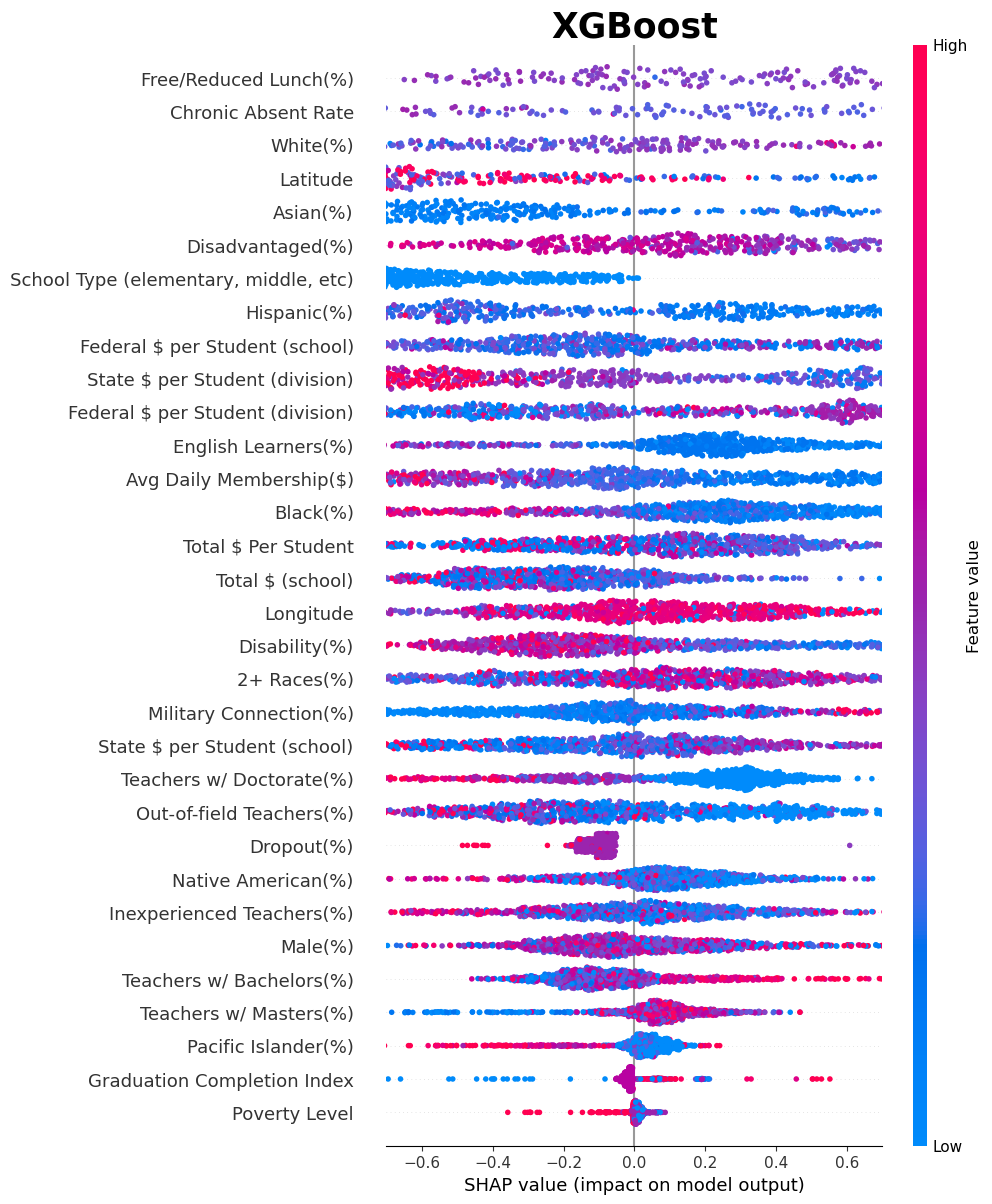

In [100]:
xgb_shap_df, xgb_shap_vals = get_shap(xgb_model, 'XGBoost', X_train_renamed)

PermutationExplainer explainer: 1027it [00:52, 15.86it/s]                          


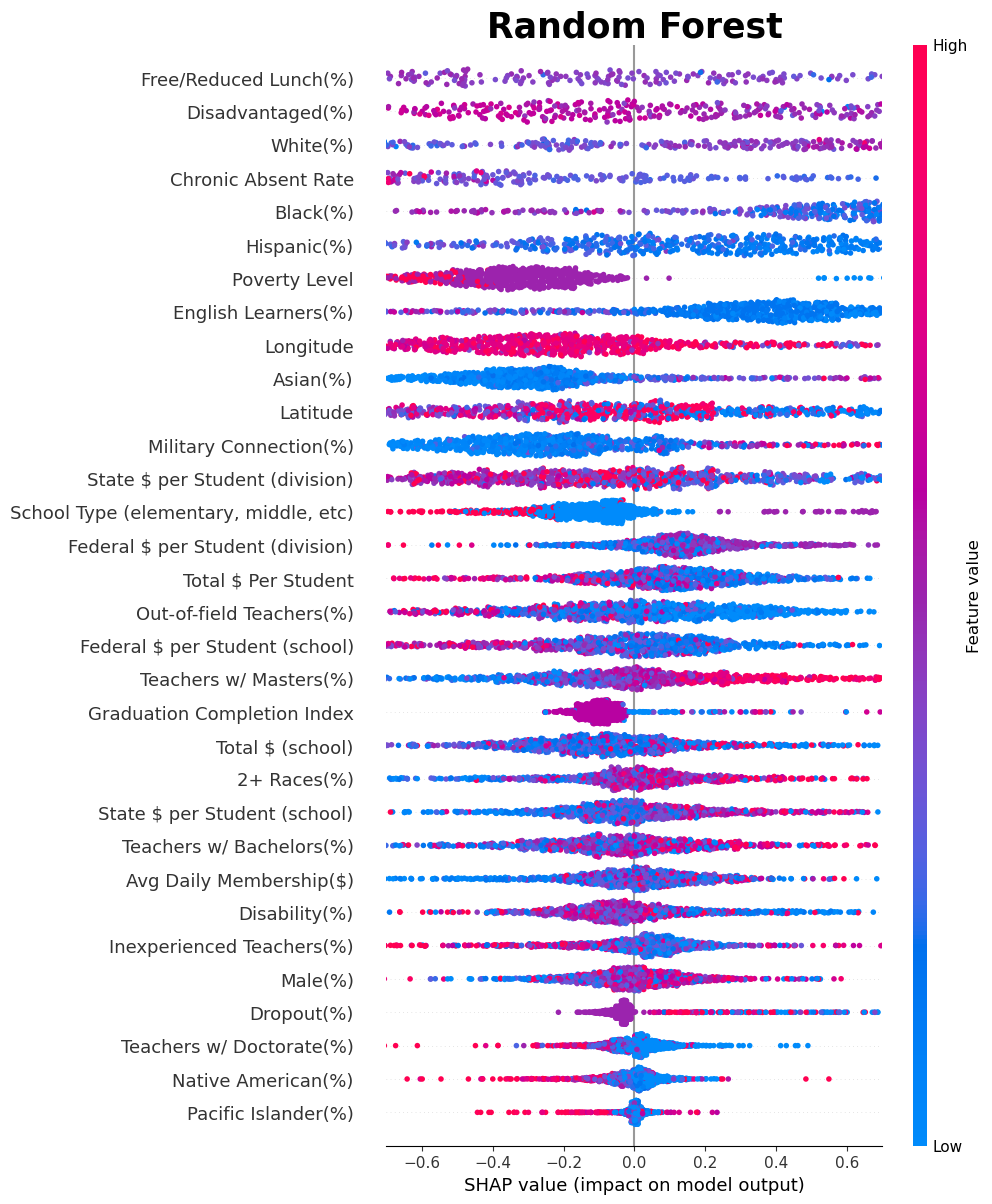

In [101]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning) #Suppress warnings
rf_shap_plot, rf_shap_vals = get_shap(rf_model, 'Random Forest', X_train_renamed)

PermutationExplainer explainer: 1027it [1:53:59,  6.67s/it]                          


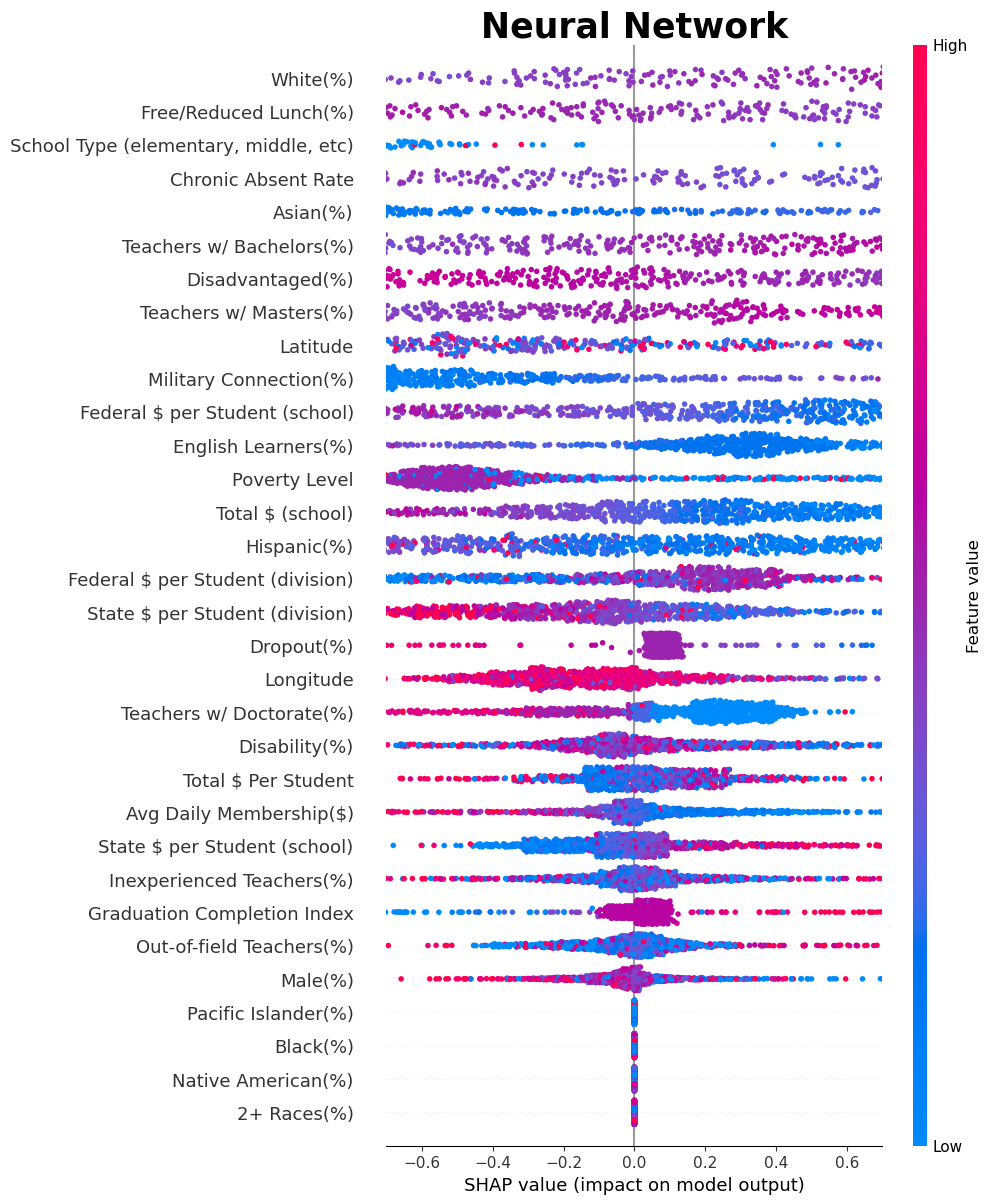

In [102]:
nn_shap_df, nn_shap_vals = get_shap(nn_model, 'Neural Network', X_train_renamed)

# Combine SHAP

In [96]:
# Merge the DataFrames to align their SHAP values based on feature_name
merged_df = pd.merge(xgb_shap_df, rf_shap_plot, on='Feature', how='outer', suffixes=('_xgb', '_rf'))
merged_df = pd.merge(merged_df, nn_shap_df, on='Feature', how='outer')
merged_df.rename(columns={'Mean Absolute SHAP Value': 'Mean Absolute SHAP Value_nn'}, inplace=True)

# Calculate the weighted average SHAP values
merged_df['weighted_average'] = np.round((
    merged_df['Mean Absolute SHAP Value_xgb'] * best_weights[0] +
    merged_df['Mean Absolute SHAP Value_rf'] * best_weights[1] +
    merged_df['Mean Absolute SHAP Value_nn'] * best_weights[2]
) / sum(best_weights), 4)

# Output the resulting weighted averages in a readable format
result = merged_df[['Feature', 'weighted_average']]
result = result.sort_values(by = 'weighted_average', ascending = False)
display(result)

,Feature,weighted_average
11,Free/Reduced Lunch(%),3.0707
4,Chronic Absent Rate,2.6042
31,White(%),2.4361
1,Asian(%),1.5400
6,Disadvantaged(%),1.4643
23,"School Type (elementary, middle, etc)",1.4387
15,Latitude,1.3099
13,Hispanic(%),0.8970
10,Federal $ per Student (school),0.7745
8,English Learners(%),0.6340
